# Regresión Logística usando bases de datos

In [15]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import seaborn as sns


In [16]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']

In [17]:
pima = pd.read_csv("Datasets/diabetes.csv", header=None, names=col_names)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0


In [18]:
pima.drop(0, axis=0, inplace=True)
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
1,6,148,72,35,0,33.6,0.627,50,1
2,1,85,66,29,0,26.6,0.351,31,0
3,8,183,64,0,0,23.3,0.672,32,1
4,1,89,66,23,94,28.1,0.167,21,0
5,0,137,40,35,168,43.1,2.288,33,1


Hay que seleccionar las variables **independientes** y la variable objetivo o **dependiente**.

In [19]:
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [20]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

**test_size** determina el tamaño de la partición, resultando en 75% de la muestra original será usada para el entrenamiento, mientras que 25% será usado para la prueba.

**random_state** planta una semilla de numpy para la generación de numeros aleatorios para el proceso de selección en la partición.

In [21]:
# Creamos el modelo de regresión

logreg = LogisticRegression(random_state=0)

In [22]:
# Entrenamos el modelo

logreg.fit(X_train,y_train)

C:\Users\eavalos\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [23]:
# Realizamos predicciones usando el grupo de prueba:

y_pred=logreg.predict(X_test)

In [24]:
# Evaluamos el modelo usando la matriz de confusión

cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[117,  13],
       [ 24,  38]], dtype=int64)

In [25]:
x_plot=X_test.to_numpy()
x_plot.shape

(192, 7)

Text(0.5, 257.44, 'Predicted label')

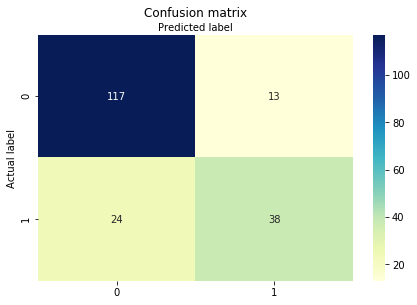

In [28]:
class_names=[0,1] # nombre de las clases
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# creamos un heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [40]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8072916666666666


In [47]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
y_pred_proba[:5]

array([0.95080369, 0.16134315, 0.10725547, 0.62628778, 0.12734974])

## Ejemplo 2

In [ ]:
# Importamos las librerias

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)

In [ ]:
data=pd.read_csv("Datasets/bank.csv", header=0, sep=";")
print(data.shape)
print()
data.head()

In [ ]:
print(list(data.columns))

En la muestra existen varias variables de tipo categóricas con más de 2 opciones:

In [ ]:
data.dtypes

In [ ]:
data.education.unique()

In [ ]:
sns.countplot(x="education", data=data, palette="hls")
plt.show()

Para esta base de datos, la variable objetivo es la columna y. Esta hace referencia a si el cliente realizo una solicitud para una cuenta de deposito en el banco.

In [ ]:
data.y.value_counts()

In [ ]:
sns.countplot(x="y", data=data, palette="hls")
plt.show()

In [ ]:
percentage=data.y.value_counts(normalize=True)
print(type(percentage))
print(percentage)

In [ ]:
data.groupby("y").mean()

In [ ]:
data.groupby("job").mean()

In [ ]:
data.groupby("marital").mean()

In [ ]:
data.groupby("education").mean()

In [ ]:
tabla_job_y=pd.crosstab(data.job,data.y)
tabla_job_y

In [ ]:
tabla_job_y.plot(kind='bar')
plt.title('Frecuencia de adquisición por tipo de trabajo')
plt.xlabel('Trabajo')
plt.ylabel('Frequencia de adquisición')
plt.savefig('purchase_fre_job')
plt.show()

In [ ]:
tabla_marital_y=pd.crosstab(data.marital,data.y)
tabla_marital_y_pct=tabla_marital_y.div(tabla_marital_y.sum(1).astype(float), axis=0)
tabla_marital_y_pct

In [ ]:
tabla_marital_y_pct.plot(kind='bar', stacked=True)
plt.title('Gráfica de barras apilada: Situación marital vs Adquisición')
plt.xlabel('Situación marital')
plt.ylabel('Proporción de Clientes')
plt.savefig('mariral_vs_pur_stack')

In [ ]:
tabla_edu_y=pd.crosstab(data.education,data.y)
tabla_edu_y.div(tabla_edu_y.sum(1).astype(float), axis=0).plot(kind='bar', stacked=True)
plt.title('Gráfica de barras apilada: Educación vs Adquisición')
plt.xlabel('Educación')
plt.ylabel('Proporción de Clientes')
plt.savefig('edu_vs_pur_stack')

In [ ]:
pd.crosstab(data.month,data.y).plot(kind='bar')
plt.title('Frecuencia de adquisición por mes')
plt.xlabel('Mes')
plt.ylabel('Frequencia de adquisición')
plt.savefig('pur_dayofweek_bar')
plt.show()

In [ ]:
data.age.hist()
plt.title('Histograma Edad')
plt.xlabel('Edad')
plt.ylabel('Frecuencia')
plt.savefig('hist_age')
plt.show()

In [ ]:
pd.crosstab(data.poutcome,data.y).plot(kind='bar')
plt.title('Frecuencia de adquisición vs Resultado de la campaña previa')
plt.xlabel('Resultado de la campaña previa')
plt.ylabel('Frecuencia de adquisición')
plt.savefig('pur_fre_pout_bar')
plt.show()

## Creando dummy variables

In [ ]:
cat_vars=['job','marital','education','default','housing','loan','contact','month','poutcome']
for var in cat_vars:
    cat_list = pd.get_dummies(data[var], prefix=var)
    data1=data.join(cat_list)
    data=data1

In [ ]:
data_vars=data.columns.values.tolist()
to_keep=[i for i in data_vars if i not in cat_vars]
to_loose=[i for i in data_vars if i in cat_vars]

In [ ]:
len(data_vars)

In [ ]:
len(to_keep)

In [ ]:
len(to_loose)

In [ ]:
print(to_loose)

In [ ]:
data_final=data[to_keep]
data_final.head()

In [ ]:
data_final.y=data_final.y.apply(lambda x:1 if x=="yes" else 0)
data_final.head()

In [ ]:
data_final.columns

In [ ]:
independent_variables=[0,3,4,8,9,10,11,12,13,14,15,16,
                     17,18,19,20,21,22,23,24,25,26,27,
                     28,29,30,31,32,33,34,35,36,37,38,
                     39,40,41,42,43,44,45,46,47,48,49,
                    50,51]

In [ ]:
x=np.array(data_final.age).reshape(-1,1)
y=data_final.y

In [ ]:
model = LogisticRegression(random_state=0).fit(x,y)

In [ ]:
plt.scatter(x.ravel(), y, color='yellow', alpha=0.5)
plt.plot(x.ravel(), model.predict_proba(x)[:,1], color='green', alpha=0.5)
plt.show()